### Dataset Overview

This comprehensive pharmaceutical synthetic dataset contains 1,436 records of synthetic drug information with 15 columns, designed for data science projects focusing on healthcare analytics, drug safety analysis, and pharmaceutical research. The dataset simulates real-world pharmaceutical data with appropriate variety and realistic constraints for machine learning applications.   
Source: [Drug Labels & Side Effects Dataset](https://www.kaggle.com/datasets/pratyushpuri/drug-labels-and-side-effects-dataset-1400-records/data)

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

### Loading the Data

In [178]:
drugs_data = pd.read_csv("realistic_drug_labels_side_effects.csv")

### Taking a Quick Look at the Data Structure

In [179]:
drugs_data.head(5)

,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,price_usd,batch_number,expiry_date,side_effect_severity,approval_status
0,Seroxetine50,AstraZeneca,1996,Antidepressant,Allergy relief,"Fatigue, Nausea",260,Rectal,Bleeding disorders,Avoid alcohol,192.43,MV388Pl,2026-11-29,Mild,Pending
1,Mecoparin93,AstraZeneca,2018,Vaccine,Allergy relief,Nausea,470,Inhalation,Allergic reaction,Take with food,397.82,UR279ZN,2027-07-14,Mild,Approved
2,Daxozole89,Merck & Co.,1997,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",330,Sublingual,High blood pressure,Take with food,131.69,we040kH,2028-06-02,Moderate,Pending
3,Viracillin84,Roche Holding AG,2004,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Oral,Kidney impairment,Do not operate machinery,372.82,hO060rh,2026-07-07,Mild,Rejected
4,Amoxstatin62,Pfizer Inc.,2003,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",430,Topical,Bleeding disorders,Do not operate machinery,281.48,Fa621Sw,2027-12-28,Moderate,Pending


In [180]:
drugs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   drug_name             1436 non-null   object 
 1   manufacturer          1436 non-null   object 
 2   approval_year         1436 non-null   int64  
 3   drug_class            1436 non-null   object 
 4   indications           1436 non-null   object 
 5   side_effects          1436 non-null   object 
 6   dosage_mg             1436 non-null   int64  
 7   administration_route  1436 non-null   object 
 8   contraindications     1436 non-null   object 
 9   warnings              1436 non-null   object 
 10  price_usd             1436 non-null   float64
 11  batch_number          1436 non-null   object 
 12  expiry_date           1436 non-null   object 
 13  side_effect_severity  1436 non-null   object 
 14  approval_status       1436 non-null   object 
dtypes: float64(1), int64(

In [181]:
drugs_data.isnull().sum()

drug_name               0
manufacturer            0
approval_year           0
drug_class              0
indications             0
side_effects            0
dosage_mg               0
administration_route    0
contraindications       0
warnings                0
price_usd               0
batch_number            0
expiry_date             0
side_effect_severity    0
approval_status         0
dtype: int64

In [182]:
drugs_data["drug_class"].value_counts()

drug_class
Anti-inflammatory    158
Antidepressant       156
Antipsychotic        147
Vaccine              144
Antifungal           144
Antibiotic           143
Antihistamine        143
Antiviral            141
Antipyretic          134
Analgesic            126
Name: count, dtype: int64

In [183]:
drugs_data.describe(include='all')

,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,price_usd,batch_number,expiry_date,side_effect_severity,approval_status
count,1436,1436,1436.000000,1436,1436,1436,1436.000000,1436,1436,1436,1436.000000,1436,1436,1436,1436
unique,1337,10,NaN,10,10,435,NaN,7,10,10,NaN,1436,806,3,3
top,Viraparin98,Merck & Co.,NaN,Anti-inflammatory,Depression treatment,Blurred vision,NaN,Intramuscular,Asthma,May cause drowsiness,NaN,Ao408CX,2028-06-02,Mild,Pending
freq,4,157,NaN,158,154,63,NaN,233,175,173,NaN,1,7,490,496
mean,NaN,NaN,2006.860028,NaN,NaN,NaN,509.637883,NaN,NaN,NaN,251.844854,NaN,NaN,NaN,NaN
std,NaN,NaN,10.167067,NaN,NaN,NaN,286.417268,NaN,NaN,NaN,142.640781,NaN,NaN,NaN,NaN
min,NaN,NaN,1990.000000,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,1.210000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1998.000000,NaN,NaN,NaN,270.000000,NaN,NaN,NaN,128.830000,NaN,NaN,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,NaN,515.000000,NaN,NaN,NaN,255.130000,NaN,NaN,NaN,NaN
75%,NaN,NaN,2016.000000,NaN,NaN,NaN,760.000000,NaN,NaN,NaN,372.207500,NaN,NaN,NaN,NaN


### EDA

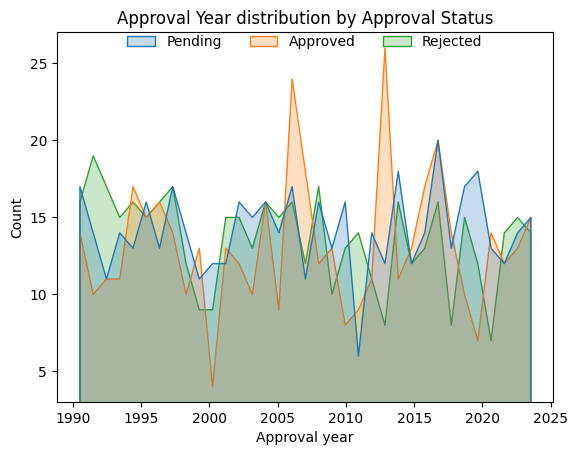

In [184]:
ax = sns.histplot(data=drugs_data, x='approval_year', bins=35, hue='approval_status', element='poly')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 0.92), ncol=3, title=None, frameon=False,
)
ax.set(xlabel='Approval year', title='Approval Year distribution by Approval Status', ylim=[3, 27])
plt.show()

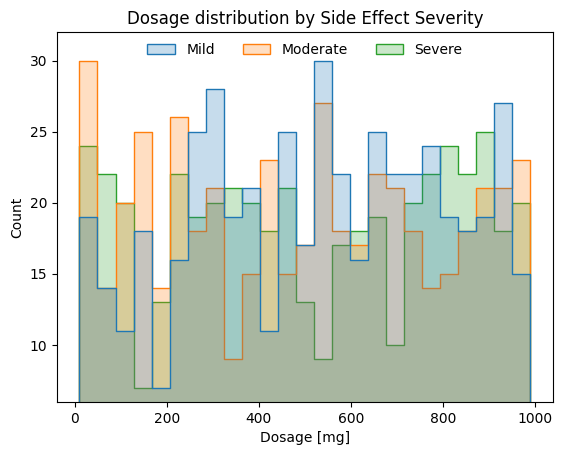

In [185]:
ax = sns.histplot(data=drugs_data, x='dosage_mg', bins=25, hue='side_effect_severity', element='step')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 0.9), ncol=3, title=None, frameon=False,
)
ax.set(xlabel='Dosage [mg]', title='Dosage distribution by Side Effect Severity', ylim=[6, 32])
plt.show()

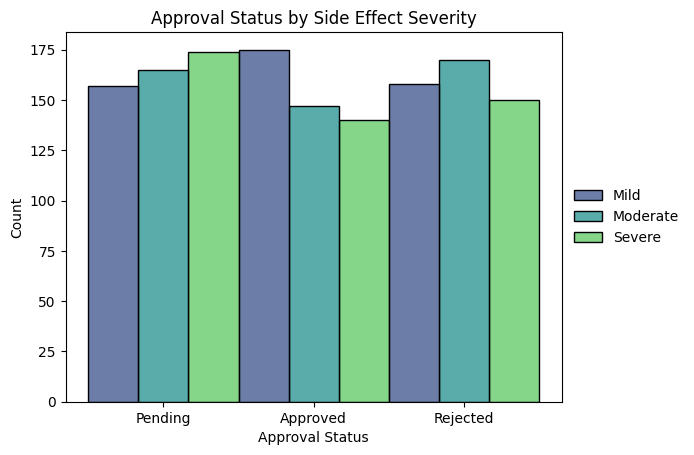

In [186]:
ax = sns.histplot(data=drugs_data, x='approval_status', hue='side_effect_severity',  multiple='dodge', palette='viridis')
sns.move_legend(
    ax, "center left",
    bbox_to_anchor=(1, 0.5), ncol=1, title=None, frameon=False,
)
ax.set(xlabel='Approval Status', title='Approval Status by Side Effect Severity')
plt.show()

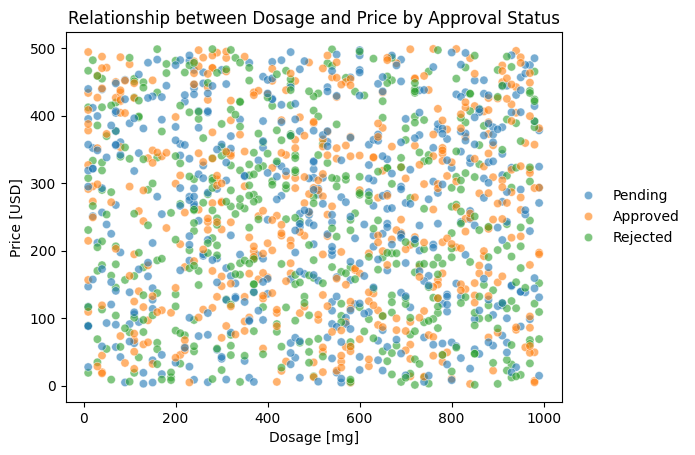

In [187]:
ax = sns.scatterplot(data=drugs_data, x='dosage_mg', y='price_usd', hue='approval_status', alpha=0.6)
sns.move_legend(
    ax, "center left",
    bbox_to_anchor=(1, 0.5), ncol=1, title=None, frameon=False,
)
ax.set(xlabel='Dosage [mg]', ylabel='Price [USD]', title='Relationship between Dosage and Price by Approval Status')
plt.show()

In [188]:
drugs_data['dosage_mg'].corr(drugs_data['price_usd'])

np.float64(-0.02858403340361403)

In [189]:
drugs_data['price_per_mg'] = drugs_data['price_usd'] / drugs_data['dosage_mg']

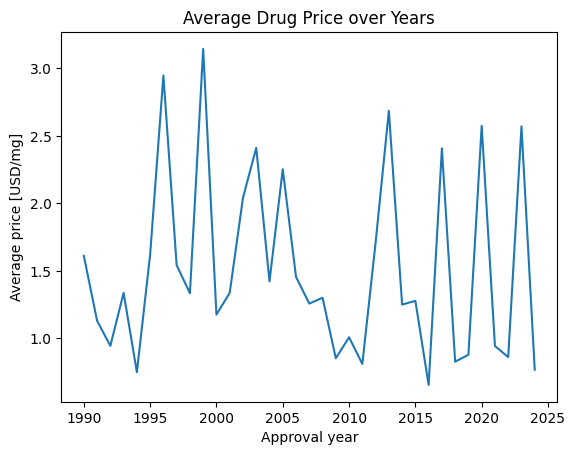

In [190]:
avg_price_per_mg_by_year = drugs_data.groupby('approval_year')['price_per_mg'].mean().reset_index()
ax = sns.lineplot(x=avg_price_per_mg_by_year['approval_year'], y=avg_price_per_mg_by_year['price_per_mg'])
ax.set(xlabel='Approval year', ylabel='Average price [USD/mg]', title='Average Drug Price over Years')
plt.show()

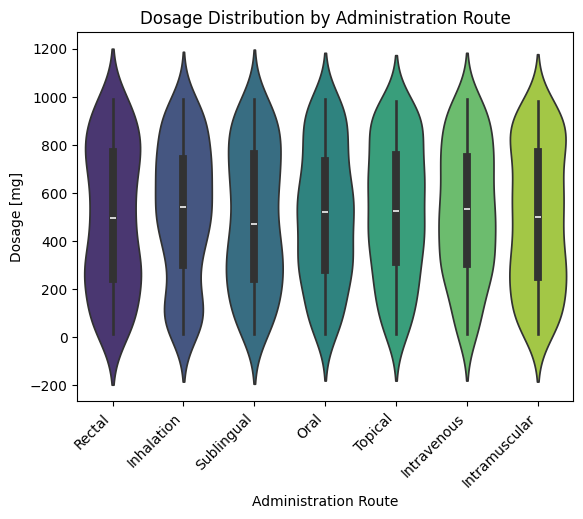

In [191]:
ax = sns.violinplot(data=drugs_data, x='administration_route', y='dosage_mg', hue='administration_route', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')
ax.set(xlabel='Administration Route', ylabel='Dosage [mg]', title='Dosage Distribution by Administration Route')
plt.show()

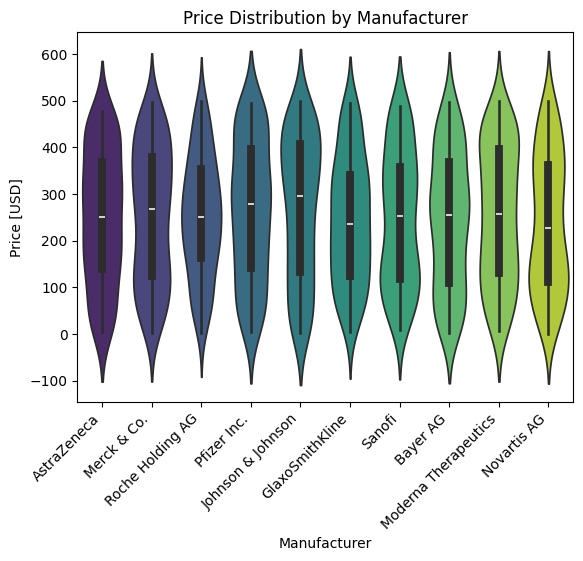

In [192]:
ax = sns.violinplot(data=drugs_data, x='manufacturer', y='price_usd', hue='manufacturer', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')
ax.set(xlabel='Manufacturer', ylabel='Price [USD]', title='Price Distribution by Manufacturer')
plt.show()

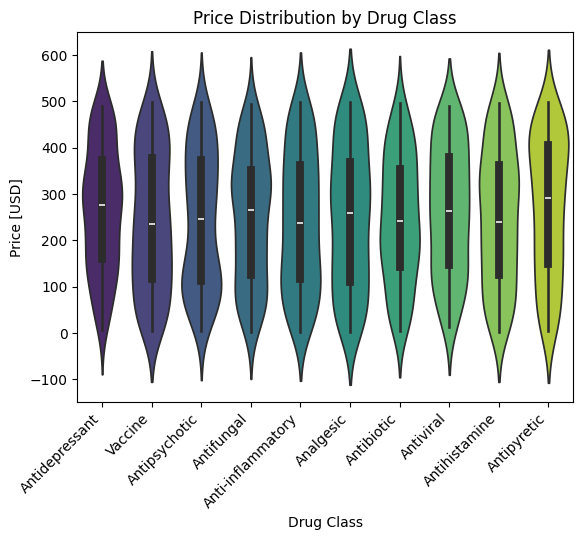

In [193]:
ax = sns.violinplot(data=drugs_data, x='drug_class', y='price_usd', hue='drug_class', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')
ax.set(xlabel='Drug Class', ylabel='Price [USD]', title='Price Distribution by Drug Class')
plt.show()

### Cleaning the Data

In [194]:
drugs_data['expiry_date'] = pd.to_datetime(drugs_data['expiry_date'])
drugs_data.dtypes

drug_name                       object
manufacturer                    object
approval_year                    int64
drug_class                      object
indications                     object
side_effects                    object
dosage_mg                        int64
administration_route            object
contraindications               object
warnings                        object
price_usd                      float64
batch_number                    object
expiry_date             datetime64[ns]
side_effect_severity            object
approval_status                 object
price_per_mg                   float64
dtype: object

In [195]:
drug_counts = drugs_data['drug_name'].value_counts()
non_unique_names = drug_counts[drug_counts > 1].index
filtered_data = drugs_data[drugs_data['drug_name'].isin(non_unique_names)]
filtered_data.groupby("drug_name", group_keys=True)[['approval_year','manufacturer', 'price_usd', 'approval_status']].apply(lambda x: x)


approval_year       manufacturer  price_usd approval_status
drug_name                                                                     
Amoxcillin71 80             2017             Sanofi     404.29         Pending
             347            2002   Roche Holding AG      66.66         Pending
Amoxparin66  516            2010  Johnson & Johnson     109.29        Rejected
             533            2011        Merck & Co.      44.46        Approved
Amoxstatin72 947            2020    GlaxoSmithKline     237.56         Pending
...                          ...                ...        ...             ...
Zylostatin92 587            2006        AstraZeneca      34.79        Rejected
Zyloxetine98 361            2019             Sanofi      22.31        Approved
             1191           2011        Novartis AG     176.50        Rejected
Zylozole18   440            2021           Bayer AG     390.05        Rejected
             528            1990             Sanofi      59.47        Rejected

[194 rows x 4 columns]

In [196]:
drugs_data_sorted = drugs_data.sort_values(by='approval_year')
drugs_data_sorted['unique_drug'] = (~drugs_data_sorted['drug_name'].duplicated()).astype(int)
drugs_data = drugs_data_sorted.sort_index()
drugs_data[['drug_name', 'approval_year', 'unique_drug']]

,drug_name,approval_year,unique_drug
0,Seroxetine50,1996,1
1,Mecoparin93,2018,1
2,Daxozole89,1997,1
3,Viracillin84,2004,1
4,Amoxstatin62,2003,1
...,...,...,...
1431,Mecozole92,1993,1
1432,Amoxvir17,2010,0
1433,Zylovir17,2007,1
1434,Mecoprofen32,1994,1


In [197]:
drugs_data[['approval_year', 'unique_drug', 'price_per_mg']]

,approval_year,unique_drug,price_per_mg
0,1996,1,0.740115
1,2018,1,0.846426
2,1997,1,0.399061
3,2004,1,0.828489
4,2003,1,0.654605
...,...,...,...
1431,1993,1,0.055859
1432,2010,0,0.267466
1433,2007,1,0.151135
1434,1994,1,0.392821


In [198]:
X = drugs_data.drop(['price_per_mg','drug_name', 'batch_number', 'side_effect_severity'], axis=1)
y = drugs_data['side_effect_severity']

In [199]:
X.columns

Index(['manufacturer', 'approval_year', 'drug_class', 'indications',
       'side_effects', 'dosage_mg', 'administration_route',
       'contraindications', 'warnings', 'price_usd', 'expiry_date',
       'approval_status', 'unique_drug'],
      dtype='object')

In [200]:
y

0           Mild
1           Mild
2       Moderate
3           Mild
4       Moderate
          ...   
1431    Moderate
1432      Severe
1433    Moderate
1434      Severe
1435      Severe
Name: side_effect_severity, Length: 1436, dtype: object

In [201]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   manufacturer          1436 non-null   object        
 1   approval_year         1436 non-null   int64         
 2   drug_class            1436 non-null   object        
 3   indications           1436 non-null   object        
 4   side_effects          1436 non-null   object        
 5   dosage_mg             1436 non-null   int64         
 6   administration_route  1436 non-null   object        
 7   contraindications     1436 non-null   object        
 8   warnings              1436 non-null   object        
 9   price_usd             1436 non-null   float64       
 10  expiry_date           1436 non-null   datetime64[ns]
 11  approval_status       1436 non-null   object        
 12  unique_drug           1436 non-null   int64         
dtypes: datetime64[ns](1), f

In [202]:
X['expiry_year'] = X['expiry_date'].dt.year
X['expiry_month'] = X['expiry_date'].dt.month
X['expiry_day'] = X['expiry_date'].dt.day
X = X.drop(columns=['expiry_date'])

In [203]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 0 to 1435
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   manufacturer          1436 non-null   object 
 1   approval_year         1436 non-null   int64  
 2   drug_class            1436 non-null   object 
 3   indications           1436 non-null   object 
 4   side_effects          1436 non-null   object 
 5   dosage_mg             1436 non-null   int64  
 6   administration_route  1436 non-null   object 
 7   contraindications     1436 non-null   object 
 8   warnings              1436 non-null   object 
 9   price_usd             1436 non-null   float64
 10  approval_status       1436 non-null   object 
 11  unique_drug           1436 non-null   int64  
 12  expiry_year           1436 non-null   int32  
 13  expiry_month          1436 non-null   int32  
 14  expiry_day            1436 non-null   int32  
dtypes: float64(1), int32(3), i

In [204]:
numerical_cols = X.select_dtypes(include='number').columns.tolist()
numerical_cols

['approval_year',
 'dosage_mg',
 'price_usd',
 'unique_drug',
 'expiry_year',
 'expiry_month',
 'expiry_day']

In [205]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in numerical_cols:
    X[col] = scaler.fit_transform(X[[col]])
X

,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,price_usd,approval_status,unique_drug,expiry_year,expiry_month,expiry_day
0,AstraZeneca,-1.068530,Antidepressant,Allergy relief,"Fatigue, Nausea",-0.871892,Rectal,Bleeding disorders,Avoid alcohol,-0.416680,Pending,0.272115,-0.625413,1.313752,1.467163
1,AstraZeneca,1.096074,Vaccine,Allergy relief,Nausea,-0.138440,Inhalation,Allergic reaction,Take with food,1.023732,Approved,0.272115,0.395147,0.156716,-0.187601
2,Merck & Co.,-0.970139,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",-0.627408,Sublingual,High blood pressure,Take with food,-0.842653,Pending,0.272115,1.415707,-0.132544,-1.511413
3,Roche Holding AG,-0.281401,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",-0.208293,Oral,Kidney impairment,Do not operate machinery,0.848406,Rejected,0.272115,-0.625413,0.156716,-0.959825
4,Pfizer Inc.,-0.379792,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",-0.278145,Topical,Bleeding disorders,Do not operate machinery,0.207833,Pending,0.272115,0.395147,1.603011,1.356846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Pfizer Inc.,-1.363703,Antihistamine,Fungal infections,Dry mouth,1.188758,Inhalation,Liver disease,May affect fertility,-1.433223,Rejected,0.272115,-0.625413,-1.578839,0.474304
1432,GlaxoSmithKline,0.308945,Antihistamine,Fungal infections,"Nausea, Fatigue, Headache",1.293536,Inhalation,Diabetes,May affect fertility,-0.115539,Rejected,-3.674922,0.395147,0.735234,1.356846
1433,Pfizer Inc.,0.013772,Antibiotic,Fever reduction,"Insomnia, Dizziness",1.572946,Topical,Asthma,Do not operate machinery,-0.748678,Rejected,0.272115,-0.625413,-1.289580,-0.849507
1434,GlaxoSmithKline,-1.265312,Antifungal,Bacterial infections,Headache,0.560085,Topical,Asthma,May cause drowsiness,0.079564,Pending,0.272115,1.415707,-0.421803,-0.297919


In [206]:
side_effects_encoded = X['side_effects'].str.get_dummies(sep=', ')
print("One-Hot Encoded Side Effects:")
side_effects_encoded 

One-Hot Encoded Side Effects:


,Blurred vision,Constipation,Diarrhea,Dizziness,Dry mouth,Fatigue,Headache,Insomnia,Nausea,Rash
0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,1,0,1,1,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1431,0,0,0,0,1,0,0,0,0,0
1432,0,0,0,0,0,1,1,0,1,0
1433,0,0,0,1,0,0,0,1,0,0
1434,0,0,0,0,0,0,1,0,0,0


In [207]:
X = pd.concat([X, side_effects_encoded], axis=1)
X = X.drop('side_effects', axis=1)

In [208]:
categorical_columns= X.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['manufacturer',
 'drug_class',
 'indications',
 'administration_route',
 'contraindications',
 'warnings',
 'approval_status']

In [209]:
X_encoded = pd.get_dummies(X, columns=categorical_columns, dtype=int)
print("One-Hot Encoded Side Effects:")
X_encoded

One-Hot Encoded Side Effects:


,approval_year,dosage_mg,price_usd,unique_drug,expiry_year,expiry_month,expiry_day,Blurred vision,Constipation,Diarrhea,...,warnings_Do not operate machinery,warnings_May affect fertility,warnings_May cause drowsiness,warnings_Monitor blood pressure,warnings_Risk of addiction,warnings_Take with food,warnings_Use with caution in elderly,approval_status_Approved,approval_status_Pending,approval_status_Rejected
0,-1.068530,-0.871892,-0.416680,0.272115,-0.625413,1.313752,1.467163,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.096074,-0.138440,1.023732,0.272115,0.395147,0.156716,-0.187601,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,-0.970139,-0.627408,-0.842653,0.272115,1.415707,-0.132544,-1.511413,1,0,1,...,0,0,0,0,0,1,0,0,1,0
3,-0.281401,-0.208293,0.848406,0.272115,-0.625413,0.156716,-0.959825,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,-0.379792,-0.278145,0.207833,0.272115,0.395147,1.603011,1.356846,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-1.363703,1.188758,-1.433223,0.272115,-0.625413,-1.578839,0.474304,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1432,0.308945,1.293536,-0.115539,-3.674922,0.395147,0.735234,1.356846,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1433,0.013772,1.572946,-0.748678,0.272115,-0.625413,-1.289580,-0.849507,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1434,-1.265312,0.560085,0.079564,0.272115,1.415707,-0.421803,-0.297919,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [210]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 0 to 1435
Data columns (total 77 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   approval_year                           1436 non-null   float64
 1   dosage_mg                               1436 non-null   float64
 2   price_usd                               1436 non-null   float64
 3   unique_drug                             1436 non-null   float64
 4   expiry_year                             1436 non-null   float64
 5   expiry_month                            1436 non-null   float64
 6   expiry_day                              1436 non-null   float64
 7   Blurred vision                          1436 non-null   int64  
 8   Constipation                            1436 non-null   int64  
 9   Diarrhea                                1436 non-null   int64  
 10  Dizziness                               1436 non-null   int64  
 

In [211]:
X_encoded.columns

Index(['approval_year', 'dosage_mg', 'price_usd', 'unique_drug', 'expiry_year',
       'expiry_month', 'expiry_day', 'Blurred vision', 'Constipation',
       'Diarrhea', 'Dizziness', 'Dry mouth', 'Fatigue', 'Headache', 'Insomnia',
       'Nausea', 'Rash', 'manufacturer_AstraZeneca', 'manufacturer_Bayer AG',
       'manufacturer_GlaxoSmithKline', 'manufacturer_Johnson & Johnson',
       'manufacturer_Merck & Co.', 'manufacturer_Moderna Therapeutics',
       'manufacturer_Novartis AG', 'manufacturer_Pfizer Inc.',
       'manufacturer_Roche Holding AG', 'manufacturer_Sanofi',
       'drug_class_Analgesic', 'drug_class_Anti-inflammatory',
       'drug_class_Antibiotic', 'drug_class_Antidepressant',
       'drug_class_Antifungal', 'drug_class_Antihistamine',
       'drug_class_Antipsychotic', 'drug_class_Antipyretic',
       'drug_class_Antiviral', 'drug_class_Vaccine',
       'indications_Allergy relief', 'indications_Bacterial infections',
       'indications_Depression treatment', 'indic

### Model training and evaluation

In [212]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [213]:
X_all, X_test, y_all, y_test = train_test_split(X_encoded, y, test_size=0.20, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.20, random_state=42, stratify=y_all)

In [214]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42),    
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "eXtreme Gradient Boosting": XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic', random_state=42)
}

# Train and evaluate
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))

# Ensemble
ensemble = VotingClassifier(
    estimators=[(k.lower().replace(" ", "_"), v) for k, v in models.items()],
    voting='soft'
)
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_val)

print("\n=== Ensemble Model ===")
print("Accuracy:", accuracy_score(y_val, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_ensemble))
print("Classification Report:\n", classification_report(y_val, y_pred_ensemble))



=== Logistic Regression ===
Accuracy: 0.3347826086956522
Confusion Matrix:
 [[32 26 21]
 [29 24 24]
 [20 33 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.41      0.40        79
           1       0.29      0.31      0.30        77
           2       0.32      0.28      0.30        74

    accuracy                           0.33       230
   macro avg       0.33      0.33      0.33       230
weighted avg       0.33      0.33      0.33       230


=== Decision Tree ===
Accuracy: 0.3652173913043478
Confusion Matrix:
 [[36 24 19]
 [37 25 15]
 [33 18 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.46      0.39        79
           1       0.37      0.32      0.35        77
           2       0.40      0.31      0.35        74

    accuracy                           0.37       230
   macro avg       0.37      0.36      0.36       230
weighted avg       0.37

### Hyperparameters tunning

In [215]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_spaces = {
    "Logistic Regression": (
        LogisticRegression(max_iter=2000, random_state=42),
        {
            'C': Real(1e-6, 1e+6, prior='log-uniform'),
            'solver': Categorical(['liblinear', 'saga']),
        }
    ),
    "Decision Tree": (
        DecisionTreeClassifier(random_state=42),
        {
            'max_depth': Integer(2, 20),
            'min_samples_split': Integer(2, 20),
            'min_samples_leaf': Integer(1, 20),
            'criterion': Categorical(['gini', 'entropy']),
        }
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            'n_estimators': Integer(100, 500),
            'max_depth': Integer(5, 25),
            'min_samples_split': Integer(2, 15),
            'min_samples_leaf': Integer(1, 15),
            'max_features': Real(0.1, 1.0, prior='uniform'),
        }
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=42),
        {
            'n_estimators': Integer(100, 500),
            'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
            'max_depth': Integer(2, 8),
            'subsample': Real(0.7, 1.0, prior='uniform'),
        }
    ),
    "k-Nearest Neighbors": (
        KNeighborsClassifier(),
        {
            'n_neighbors': Integer(1, 20),
            'weights': Categorical(['uniform', 'distance']),
            'p': Integer(1, 2), # 1 for Manhattan, 2 for Euclidean
        }
    ),
    "eXtreme Gradient Boosting": (
        XGBClassifier(eval_metric='mlogloss', random_state=42),
        {
            'n_estimators': Integer(100, 500),
            'max_depth': Integer(2, 10),
            'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
            'subsample': Real(0.6, 1.0, prior='uniform'),
            'colsample_bytree': Real(0.6, 1.0, prior='uniform'),
            'gamma': Real(0, 5),
        }
    )
}

In [216]:
from sklearn.model_selection import StratifiedKFold

N_ITER_SEARCH = 15 

cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for name, (model, search_space) in search_spaces.items():
    print(f"\n=== Tuning Hyperparameters for {name} ===")

    
    bayes_search = BayesSearchCV(
        estimator=model,
        search_spaces=search_space,
        n_iter=N_ITER_SEARCH,  
        cv=cv_strategy,       
        n_jobs=-1,            
        verbose=0,            
        random_state=42
    )
    
    bayes_search.fit(X_train, y_train)

    print(f"\nBest parameters for {name} found: \n{bayes_search.best_params_}")
    print(f"Best cross-validation score (Accuracy) for {name}: {bayes_search.best_score_:.4f}")

    print(f"\n--- Evaluating {name} on the validation set ---")
    best_model = bayes_search.best_estimator_
    y_pred = best_model.predict(X_val)

    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))
    print("=" * 40)


=== Tuning Hyperparameters for Logistic Regression ===

Best parameters for Logistic Regression found: 
OrderedDict({'C': 0.00023521292636502286, 'solver': 'liblinear'})
Best cross-validation score (Accuracy) for Logistic Regression: 0.3627

--- Evaluating Logistic Regression on the validation set ---
Accuracy: 0.30434782608695654
Confusion Matrix:
 [[32 32 15]
 [36 29 12]
 [29 36  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.41      0.36        79
           1       0.30      0.38      0.33        77
           2       0.25      0.12      0.16        74

    accuracy                           0.30       230
   macro avg       0.29      0.30      0.29       230
weighted avg       0.29      0.30      0.29       230


=== Tuning Hyperparameters for Decision Tree ===

Best parameters for Decision Tree found: 
OrderedDict({'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 10})
Best cross-v

### Evaluating the final model on the test set


=== Logistic Regression ===
Accuracy: 0.3194444444444444
Confusion Matrix:
 [[41 40 17]
 [45 40 12]
 [43 39 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.42      0.36        98
           1       0.34      0.41      0.37        97
           2       0.28      0.12      0.17        93

    accuracy                           0.32       288
   macro avg       0.31      0.32      0.30       288
weighted avg       0.31      0.32      0.30       288


=== Decision Tree ===
Accuracy: 0.3506944444444444
Confusion Matrix:
 [[38 20 40]
 [33 24 40]
 [37 17 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.39      0.37        98
           1       0.39      0.25      0.30        97
           2       0.33      0.42      0.37        93

    accuracy                           0.35       288
   macro avg       0.36      0.35      0.35       288
weighted avg       0.36

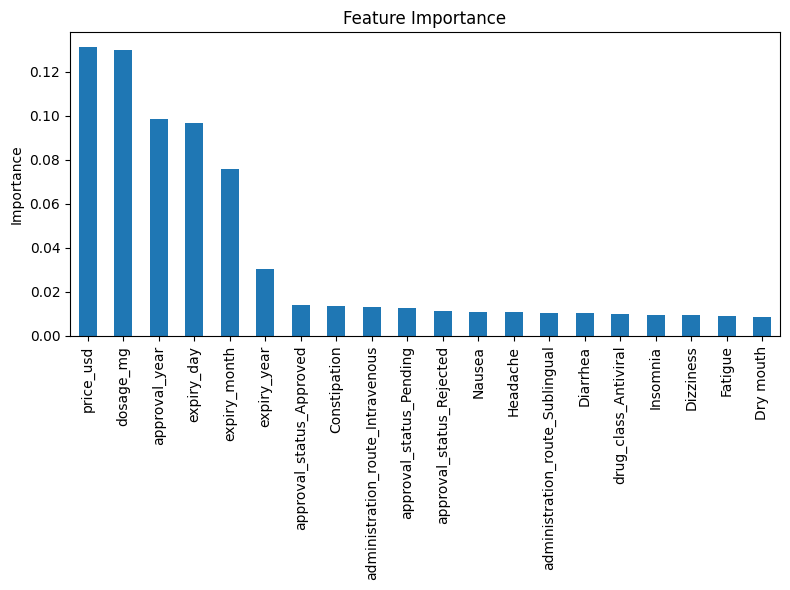

In [217]:
models = {
    "Logistic Regression": LogisticRegression(C=0.00023521292636502286, 
                                              solver='liblinear',
                                              random_state=42),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', 
                                            max_depth=9, 
                                            min_samples_leaf=3, 
                                            min_samples_split=10, 
                                            random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=15, 
                                            max_features=1.0, 
                                            min_samples_leaf=4, 
                                            min_samples_split= 4, 
                                            n_estimators=151, 
                                            random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.07074209887676745, 
                                                    max_depth=8, 
                                                    n_estimators=289, 
                                                    subsample=0.7285215899008319, 
                                                    random_state=42),    
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=1,
                                                p=2, 
                                                weights='distance'),
    "eXtreme Gradient Boosting": XGBClassifier(colsample_bytree=0.9760486817891578,
                                               gamma=0.0, 
                                               learning_rate=0.29999999999999993, 
                                               max_depth=6, 
                                               n_estimators=327, 
                                               subsample=0.6724911209588057,
                                               random_state=42)
}

# Train and evaluate
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Ensemble
ensemble = VotingClassifier(
    estimators=[(k.lower().replace(" ", "_"), v) for k, v in models.items()],
    voting='soft'
)
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

print("\n=== Ensemble Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))

importances = pd.Series(models["Random Forest"].feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
importances.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()